# Taster Workshop Data Analysis

This notebook is in combination with the UCL Data Science Society Workshop run on the 12th October 2017. We'll go through a very basic process of analyzing a dataset, introducing a basic regression model and a basic classification model. Don't worry if you don't understand the models at this point - we'll be learning more about them in the workshop series.

## Getting Started

In [45]:
import pandas as pd
from IPython.display import display, HTML
data = pd.read_csv("Iris.csv")
display(data['Species'].unique())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Getting to know the data
It's always good to have a look at the data before we start. We're going to look at three descriptions of the data: 
- Some descriptive statistics about the variables in the form of boxplots. Boxplots are good for visualising the distribution of a number of different variables, as they are quick to read and don't take up much space.
- A correlation plot to see how close two variables are to having a linear relationship with each other.

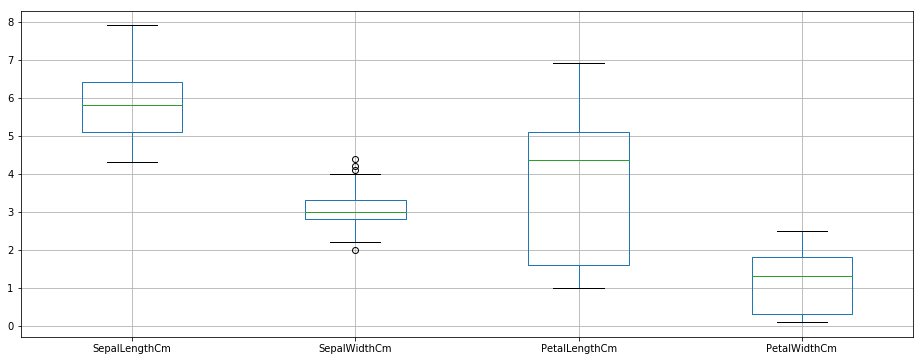

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
list(data)
boxplot = data.boxplot(
    column=[
        'SepalLengthCm',
        'SepalWidthCm',
        'PetalLengthCm',
        'PetalWidthCm'
    ]);

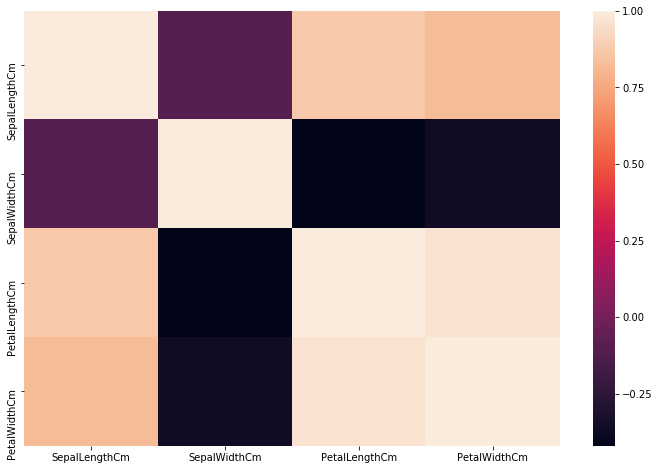

In [39]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(data[[
        'SepalLengthCm',
        'SepalWidthCm',
        'PetalLengthCm',
        'PetalWidthCm'
    ]].corr());

- From the boxplots, we can see that SepalLengthCM and SepalWidthCm follow a roughly symmetrical distribution, whereas PetalLengthCM and PetalWidthCm have a substantial skew.
- From the correlation plot, it looks like there is a strong correlation between SepalLengthCm and the petal sizes, whilst SepalWidthCm does not have a strong correlation with petal sizes.

## Analysis

### Regression
Regression is the process of using independent variables (everything except happiness score) to estimate dependent variables (happiness score).

At this point, it's worth heading onto the github site (ucldata.github.io) and taking a look at the polynomial regression demo under the Taster Workshop page. Add some data, and play around fitting different order polynomials to the data, before adding more data and seeing how the values for the regressions change. Seeing it plotted in two dimensions is a lot more intuitive than just reading from a textoutput.

We're going to see whether we can predict sepal length from the other variables.

In [28]:
# Split the data into independent variables (Xreg), which we'll used to predict the dependent variable (yreg)
yreg = data['SepalLengthCm']
Xreg = data.drop(['SepalLengthCm', 'Id', 'Species'], axis = 1)

We need split the data into training sets (used to train the model, in our case this means fitting the regression parameters to the data) and test sets (used to evaluate the performance of the model on unseen data).
- test_size is the proportion of the data that becomes the test set
- random_state is a value used by the random number generator that splits the dataset. We set this so that the dataset is split in the same way each time it is run.

In [30]:
from sklearn.model_selection import train_test_split
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size = 0.3, random_state = 13)

Now we're going to fit our model using a number of different polynomial regressions to see how they each perform.

Note: sklearn does not have a specific polynomial regression built in, so we used PolynomialFeatures to create the features in the dataset, so LinearRegression acts as polynomial regression would.

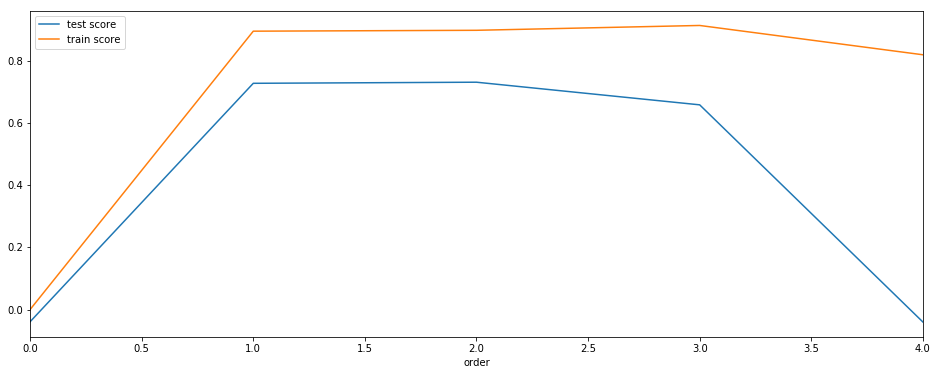

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

scores = [] # we'll store the models here
polyRange = 4 # the highest order polynomial we will fit

for order in range(0,polyRange+1):
    reg = LinearRegression()
    poly = PolynomialFeatures(degree = order)
    Xreg_train_ = poly.fit_transform(Xreg_train)
    Xreg_test_ = poly.fit_transform(Xreg_test)
    
    reg.fit(Xreg_train_, yreg_train)
    pred = reg.predict(Xreg_test_)
    test_score = reg.score(Xreg_test_, yreg_test)
    train_score = reg.score(Xreg_train_, yreg_train)
    scores.append({'order': order, 'test score': test_score, 'train score': train_score})
scores_df = pd.DataFrame(scores)
scores_df.plot(x='order', y=['test score', 'train score'], figsize=(16,6));

In this example, we can see that linear and quadratic fits perform equally well (quadratic is slightly better).

### Classification

Classification is the process of identifying to which class (in our case, continent), an observation belongs. 

Go back to the github page, and look at the k-nearest neighbors demonstration on there, play about adding different classes in different groupings and see how the decision boundaries change.

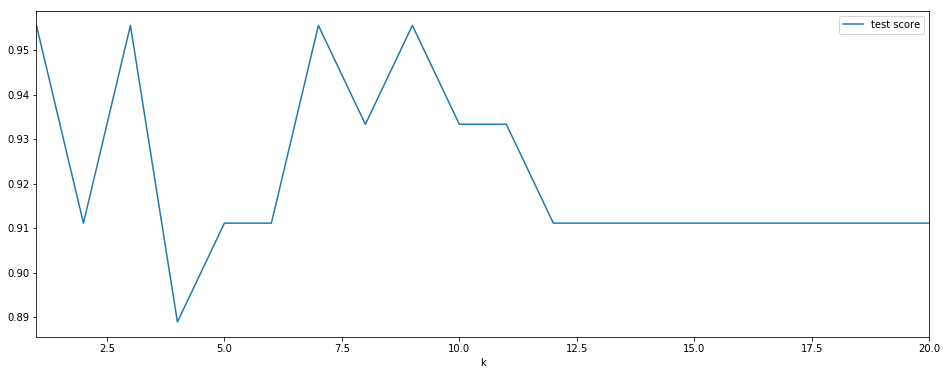

In [32]:
# Split the data into independent variables (Xcl), which we'll used to predict the dependent variable (ycl)
ycl = data['Species']
Xcl = data.drop(['Id', 'Species'], axis = 1)

# again, we split the model into training and test sets
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(Xcl, ycl, test_size = 0.3, random_state = 13)

from sklearn.neighbors import KNeighborsClassifier

scores = []
kRange = 20
for k in range(1, kRange + 1):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xcl_train, ycl_train)
    
    test_score = clf.score(Xcl_test, ycl_test)
    scores.append({'k': k, 'test score': test_score})
score_df = pd.DataFrame(scores)
score_df.plot(x='k', y='test score', figsize=(16,6));

We can see in this problem, that the best scores are attained with 1, 3 6 and 9 neighbors.